# Sensitivity Analysis: RfR
### The goal is to intervene in the system, starting from the parameters to which the model is most sensitive.
Global sensitivity analysis: uncertain inputs are sampled at the same time (e.g. with Monte Carlo/Latin Hypercube), instead of checking each input separately, next we try to understand how uncertainty in model output is a function of uncertainty in model input.
#### The following sensitivity analysis aims to:
- Find which uncertain inputs are more influential on outputs;
- How much of the uncertainty is epistemic; how much is irreducible;
- Which uncertain inputs should be a priority for research;
- Which inputs be left out/aggregated to simplify the model.

#### Methods:
- Sobol sampling

## Import packages

In [19]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (Model, 
                           ScalarOutcome,
                           TimeSeriesOutcome,
                           IntegerParameter,
                           CategoricalParameter,
                           RealParameter, 
                           perform_experiments, 
                           ema_logging,
                           Policy, 
                           MultiprocessingEvaluator, 
                           save_results, 
                           load_results, 
                           Scenario)

from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

from dike_model_function import DikeNetwork  # @UnresolvedImport
from dike_model_function_time_series import DikeNetworkTS  # @UnresolvedImport
from problem_formulation_V2_5 import get_model_for_actor_problem_formulation

## Importing the model
Importing the RfR model using a custom function for convenience.

In [42]:
# Problem formulations:
#    get_model_for_actor_problem_formulation(problem_formulation_id, outcome_type='time_series')
#    problem_formulation_id options
#        1 - RWS (GOOD)
#        2 - Environmental interest group
#        3 - Transport company 
#        4 - Delta commission
#        5 - Gelderland (GOOD)
#        6 - Overijssel (GOOD)s
#        7 - Dike rings 1 and 2
#        8 - Dike ring 3
#        9 - Dike ring 4
#        10 - Dike ring 5
#
#    outcome_type options
#        'time_series' (default)
#        'scalar'

model, planning_steps = get_model_for_actor_problem_formulation(1, outcome_type='scalar')

# Sobol global sensitivity analysis over Uncertainties

In [43]:
# Define uncertainties and convert them to SALib desired format
uncertainties = []
for unc in model.uncertainties:
    uncertainties.append(unc)
    
# for lev in model.levers:
#     uncertainties.append(lev)

problem = get_SALib_problem(uncertainties)

In [44]:
# # Define the 'non-policy', setting all policy levers to zero
levers = []
for lev in model.levers:
    levers.append(lev)
    
# non_policy = Policy("No action", **{l.name:0 for l in levers})

In [45]:
levers

[]

In [46]:
problem

{'num_vars': 50,
 'names': ['0_RfR 0',
  '0_RfR 1',
  '0_RfR 2',
  '1_RfR 0',
  '1_RfR 1',
  '1_RfR 2',
  '2_RfR 0',
  '2_RfR 1',
  '2_RfR 2',
  '3_RfR 0',
  '3_RfR 1',
  '3_RfR 2',
  '4_RfR 0',
  '4_RfR 1',
  '4_RfR 2',
  'A.0_ID flood wave shape',
  'A.1_Bmax',
  'A.1_Brate',
  'A.1_DikeIncrease 0',
  'A.1_DikeIncrease 1',
  'A.1_DikeIncrease 2',
  'A.1_pfail',
  'A.2_Bmax',
  'A.2_Brate',
  'A.2_DikeIncrease 0',
  'A.2_DikeIncrease 1',
  'A.2_DikeIncrease 2',
  'A.2_pfail',
  'A.3_Bmax',
  'A.3_Brate',
  'A.3_DikeIncrease 0',
  'A.3_DikeIncrease 1',
  'A.3_DikeIncrease 2',
  'A.3_pfail',
  'A.4_Bmax',
  'A.4_Brate',
  'A.4_DikeIncrease 0',
  'A.4_DikeIncrease 1',
  'A.4_DikeIncrease 2',
  'A.4_pfail',
  'A.5_Bmax',
  'A.5_Brate',
  'A.5_DikeIncrease 0',
  'A.5_DikeIncrease 1',
  'A.5_DikeIncrease 2',
  'A.5_pfail',
  'EWS_DaysToThreat',
  'discount rate 0',
  'discount rate 1',
  'discount rate 2'],
 'bounds': [(0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0

In [47]:
# Perform experiments using Sobol sampling over uncertainties, evaluating over non_policy
ema_logging.log_to_stderr(ema_logging.INFO)

n_scenario = 2

with MultiprocessingEvaluator(model) as evaluator:
    experiments_sobol, outcomes_sobol = evaluator.perform_experiments(scenarios=n_scenario,
                                                                      uncertainty_sampling=SOBOL)
    
results_uncertainty = experiments_sobol, outcomes_sobol

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 204 scenarios * 1 policies * 1 model(s) = 204 experiments


22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404
22792676.404971145
748259736.3348293
0.006103154321257404


[MainProcess/INFO] terminating pool
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/Users/philipseijger/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True

KeyboardInterrupt: 

In [18]:
# save_results(results_uncertainty,'Outputs/experiments_sobol_2000cases.tar.gz' )

In [27]:
experiments_sobol['0_RfR 0'].mean()

0.0

In [11]:
# Expected Annual Damage Sobol outcomes
EAD_final_sobol = outcomes_sobol['Expected Annual Damage']
EAD_score = sobol.analyze(problem, EAD_final_sobol, calc_second_order=True, print_to_console=False)

# Total Investment Costs Sobol outcomes - USING non-policy THIS REMAINS ZERO
TIC_final_sobol = outcomes_sobol['Total Investment Costs']
TIC_score = sobol.analyze(problem, TIC_final_sobol, calc_second_order=True, print_to_console=False)

# Expected Number of Deaths Sobol outcomes
END_final_sobol = outcomes_sobol['Expected Number of Deaths']
END_score = sobol.analyze(problem, END_final_sobol, calc_second_order=True, print_to_console=False)

In [12]:
def plot_sobol_interaction(sobol_score):
    Si_filter = {k:sobol_score[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(Si_filter, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(16,12)
    fig.subplots_adjust(bottom=0.3)
    plt.title('Sobol Score')
    ax.set(xlabel='Uncertainty', ylabel='Fraction of total variance')
    plt.show()
    
# We can also study the convergence of the Sobol indices as a function of the number of samples,
# by computing the indices over a partial sample:

def plot_sobol_convergence(final_sobol):

    s_data = pd.DataFrame(index=problem['names'],
                          columns=np.arange(1,n_scenario,5)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, final_sobol[0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
        
    fig, ax = plt.subplots(1)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Total index (ST)')
    plt.title('Sobol Convergence')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

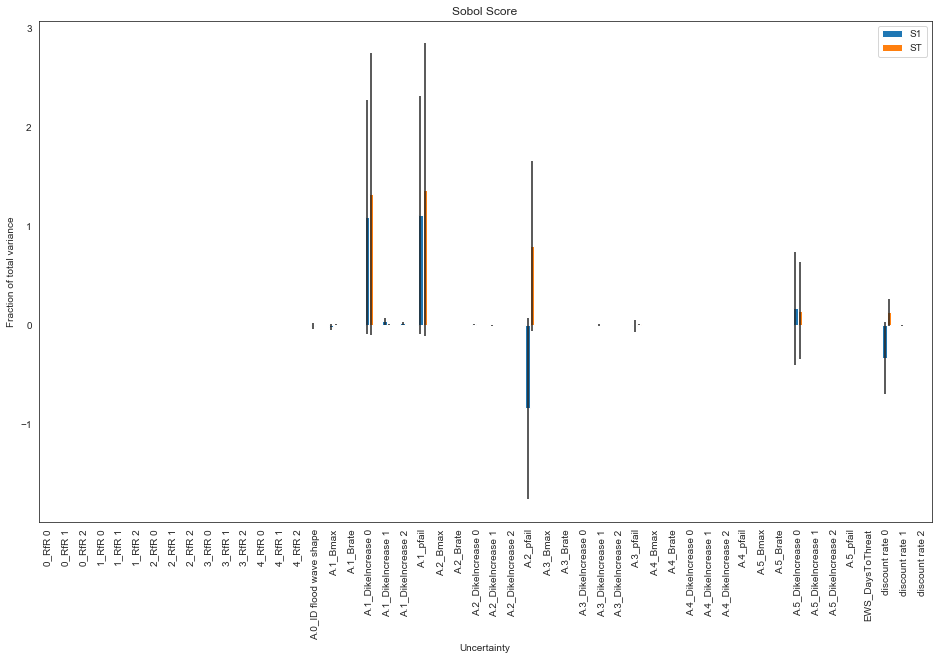

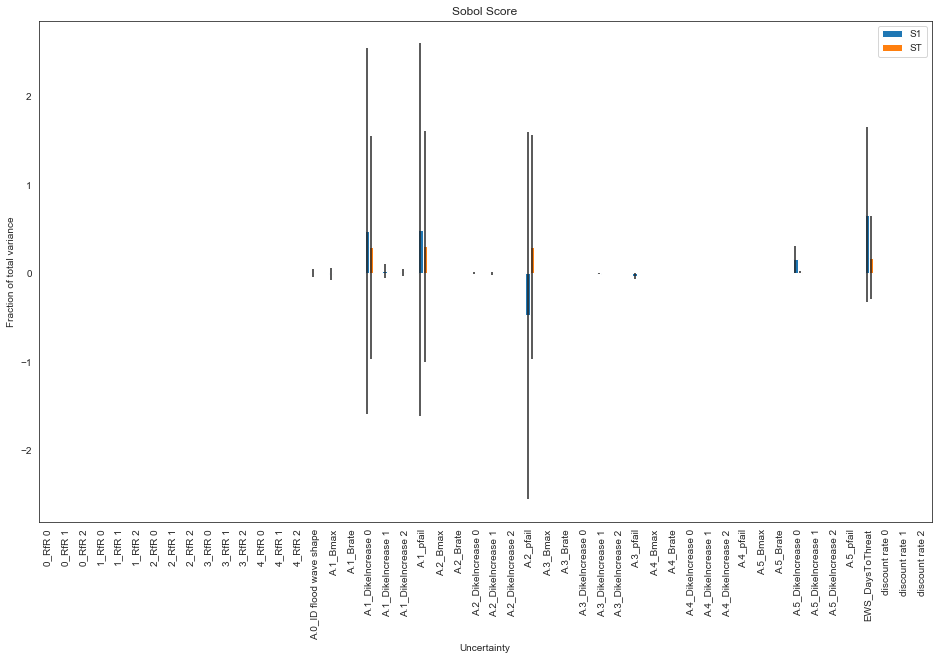

In [13]:
plot_sobol_interaction(EAD_score)
plot_sobol_interaction(END_score)

/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  a

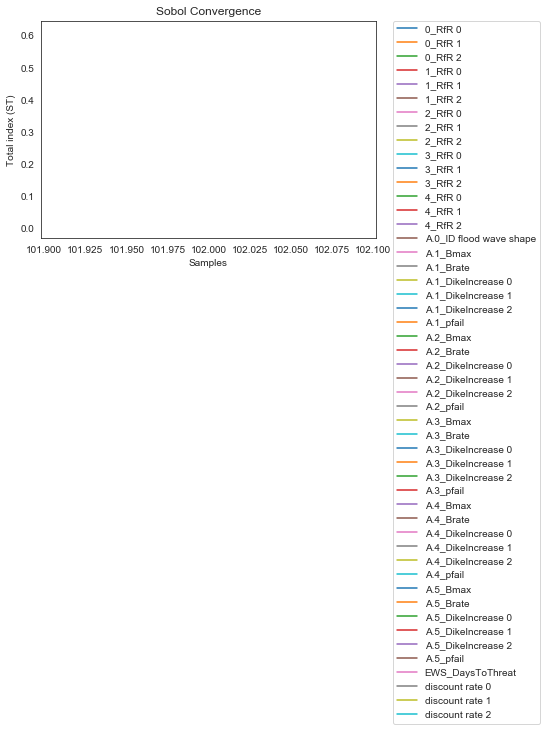

/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  ax.set_xlim(left, right)
/Users/philipseijger/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=102.0, right=102.0
  a

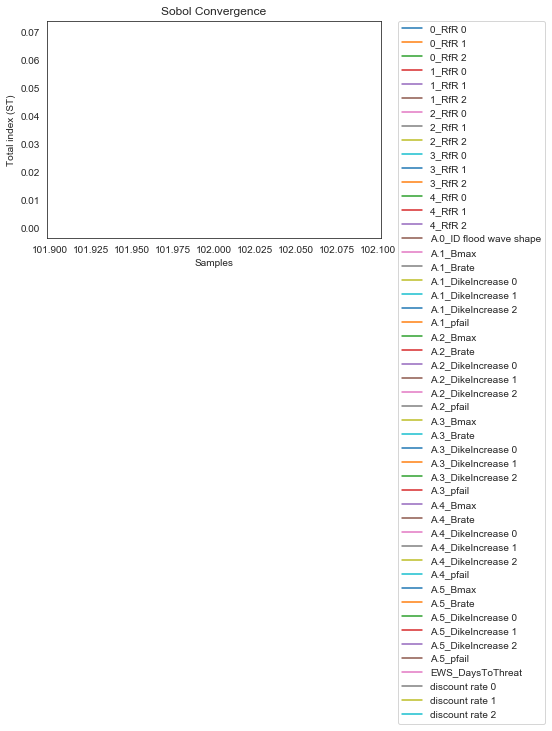

In [14]:
plot_sobol_convergence(EAD_final_sobol)
plot_sobol_convergence(END_final_sobol)

# Sobol global sensitivity analysis over LEVERS

In [69]:
# Import model
model, planning_steps = get_model_for_actor_problem_formulation(3, outcome_type='scalar')

# Define LEVERS and convert them to SALib desired format
levers = []
for lev in model.levers:
    levers.append(lev)

problem_levers = get_SALib_problem(levers)

In [70]:
# Define the 'non-uncertainty', setting all uncertainties to zero
reference_values = {'Bmax': 175, 
                      'Brate': 1.5, 
                      'pfail': 0.5,
                      'discount rate': 3.5,
                      'ID flood wave shape': 4}

reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
scen1 = {}

for key in model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})
        
    else:
        scen1.update({key.name: reference_values[name_split[1]]})

ref_scenario = Scenario('reference', **scen1)

In [88]:
# Test policies

from SALib.sample import saltelli

policy_values = saltelli.sample(problem_levers, 1000)

policies = Policy(policy_values)

In [89]:
# Perform experiments using Sobol sampling over uncertainties, evaluating over non_policy
ema_logging.log_to_stderr(ema_logging.INFO)

n_policy = 100

with MultiprocessingEvaluator(model) as evaluator:
    experiments_sobol_levers, outcomes_sobol_levers = evaluator.perform_experiments(scenarios=ref_scenario, policies=policy_values,
                                                                      uncertainty_sampling=SOBOL)
    
results_levers = experiments_sobol_levers, outcomes_sobol_levers

[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
save_results(results_levers,'Outputs/experiments_levers_sobol_2400cases.tar.gz' )

[MainProcess/INFO] results saved successfully to /Users/philipseijger/Dropbox (Personal)/EPA/EPA1361-ModelBasedDecisionMaking/mbdm_1_RfR/SensitivityAnalysisSobol/Outputs/experiments_levers_sobol_2400cases.tar.gz


In [75]:
# Expected Annual Damage Sobol outcomes LEVERS
EAD_final_sobol_levers = outcomes_sobol_levers['Expected Annual Damage']
EAD_score_levers = sobol.analyze(problem_levers, EAD_final_sobol_levers, calc_second_order=True, print_to_console=False)

# Total Investment Costs Sobol outcomes LEVERS
TIC_final_sobol_levers = outcomes_sobol_levers['Total Investment Costs']
TIC_score_levers = sobol.analyze(problem_levers, TIC_final_sobol_levers, calc_second_order=True, print_to_console=False)

# Expected Number of Deaths Sobol outcomes LEVERS
END_final_sobol_levers = outcomes_sobol_levers['Expected Number of Deaths']
END_score_levers = sobol.analyze(problem_levers, END_final_sobol_levers, calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [74]:
len(EAD_final_sobol_levers)

100